In [1]:
# Imports
import numpy as np
import scipy as sp
from scipy import optimize
import matplotlib.pyplot as plt

In [2]:
np.__version__

'2.0.1'

In [3]:
sp.__version__

'1.14.0'

https://stackoverflow.com/questions/78872637/why-does-using-scipy-optimize-curvefit-with-numpy-piecewise-throw-attribute-and?noredirect=1#comment139061972_78872637

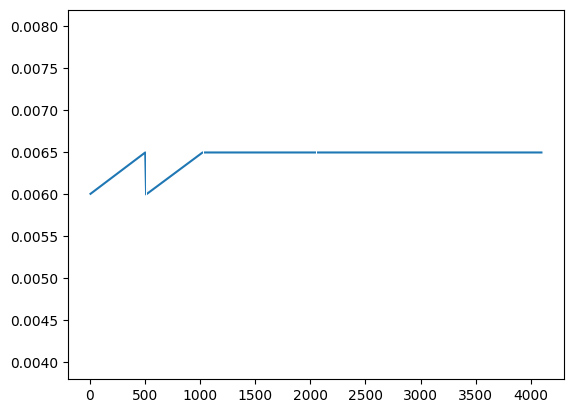

array([0.006 , 0.0065, 0.006 , 0.0065])

In [5]:

# Piecewise function
def my_piecewise(
    x: float,
    a: float,
    b: float,
    c: float,
    d: float,
    precision: float = 64,
):
    domain_length = 512
    if precision == 32:
        domain_length = 1024

    if precision not in (32, 64):
        raise ValueError("Precision must be either 64 or 32")

    y = np.piecewise(
        x,
        [
            x <= 0,
            x < domain_length,
            (x >= domain_length) & (x < 2 * domain_length),
            x >= 2 * domain_length,
        ],
        [
            lambda x: 0,
            lambda x: a + ((b - a) / (domain_length - 8)) * x,
            lambda x: c + ((d - c) / domain_length) * (x - domain_length),
            lambda x: d,
        ],
    )

    return y


# p0 parameters for curve_fit
init_guess = [
    0.006,
    0.0065,
    0.006,
    0.0065,
]

# x and y data
x_space = np.linspace(8, 4096, 512, endpoint=True)
y_space = my_piecewise(x_space, *init_guess)

# plotting with matplotlib works fine
plt.plot(x_space, y_space)
for i in [512, 1024, 2048]:
    plt.vlines(i, 0.004, 0.008, color="white", linewidth=0.75)
plt.show()

# curve_fit
param, param_cov = optimize.curve_fit(
    f=my_piecewise,
    xdata=x_space,
    ydata=y_space,
    p0=init_guess,
)
param